In [8]:
import streamlit as st
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
import joblib

In [3]:
dataset_path='https://frenzy86.s3.eu-west-2.amazonaws.com/fav/iris.data'
df = pd.read_csv(dataset_path, header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
X = df.drop(columns='class')
y = df['class']

In [20]:
X.to_csv("iris_dataset.csv", index=False)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 667
                                                    )

In [10]:
model = LogisticRegression(fit_intercept=True)
model.fit(X_train, y_train)

LogisticRegression()

In [14]:
y_pred = model.predict(X_test)

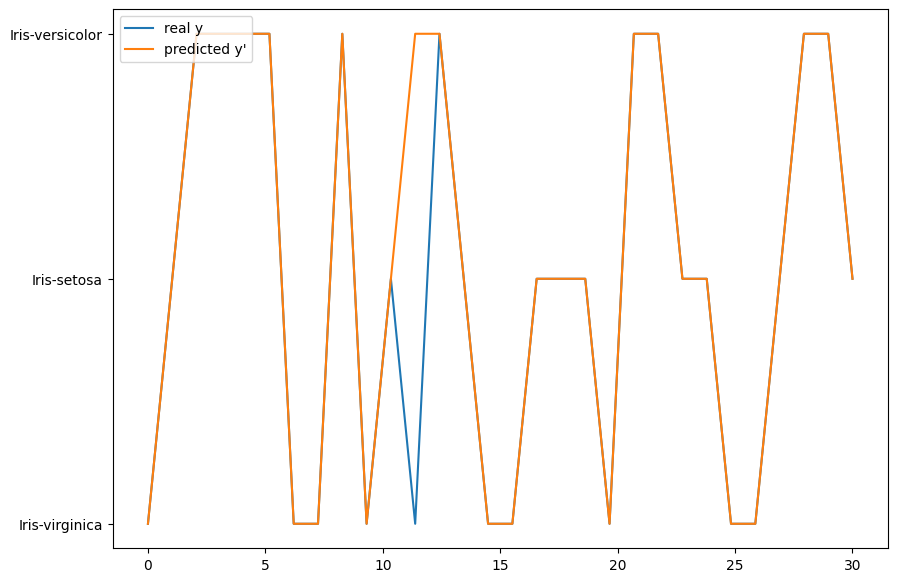

In [15]:
length = y_pred.shape[0] #  
x = np.linspace(0,length,length)

plt.figure(figsize=(10,7))
plt.plot(x, y_test, label='real y')
plt.plot(x, y_pred, label="predicted y'")
plt.legend(loc=2);

In [16]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

In [18]:
joblib.dump(model, 'iris_model.pkl')

['iris_model.pkl']